<a href="https://colab.research.google.com/github/anandaditya07/Soft-Computing/blob/main/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#Aditya Anand 23SCSE1010560
#Practical 1: Single Neuron with Step Activation
import numpy as np

def step_function(x):
  return 1 if x > 0 else 0 # Changed 'e' to '0' as 'e' was undefined

# Inputs (X1, X2) and Weights
inputs = np.array([1, 0])
weights = np.array([0.5, 0.55])
bias = -0.2 # Corrected syntax

# Weighted sum
z = np.dot(inputs, weights) + bias # Added bias to the weighted sum

# output after activation
output = step_function(z)

print("Inputs:", inputs)
print("Weights:", weights)
print("Bias:", bias)
print("Weighted Sum:", z)
print("Neuron Output:", output)

Inputs: [1 0]
Weights: [0.5  0.55]
Bias: -0.2
Weighted Sum: 0.3
Neuron Output: 1


In [76]:
#Aditya Anand 23SCSE1010560
# Practical 2: Simulation of McCulloch–Pitts Neural Model
# Implementing AND, OR, and NOT logic gates

def McCullochPitts(inputs, weights, threshold):
    # Weighted sum
    net = sum(i*w for i, w in zip(inputs, weights))
    # Step activation function
    return 1 if net >= threshold else 0


# ---------- AND Gate ----------
print("AND Gate:")
# For AND: weights = [1,1], threshold = 2
for x1 in [0,1]:
    for x2 in [0,1]:
        y = McCullochPitts([x1, x2], [1, 1], 2)
        print(f"{x1} AND {x2} = {y}")


# ---------- OR Gate ----------
print("\nOR Gate:")
# For OR: weights = [1,1], threshold = 1
for x1 in [0,1]:
    for x2 in [0,1]:
        y = McCullochPitts([x1, x2], [1, 1], 1)
        print(f"{x1} OR {x2} = {y}")


# ---------- NOT Gate ----------
print("\nNOT Gate:")
# For NOT: weight = [-1], threshold = 0
for x in [0,1]:
    y = McCullochPitts([x], [-1], 0)
    print(f"NOT {x} = {y}")


AND Gate:
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1

OR Gate:
0 OR 0 = 0
0 OR 1 = 1
1 OR 0 = 1
1 OR 1 = 1

NOT Gate:
NOT 0 = 1
NOT 1 = 0


In [77]:
#Aditya Anand 23SCSE1010560
# Practical 3: AND Gate Implementation using Artificial Neural Network in Keras”

import numpy as np

# 1. Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 2. Dataset (AND Gate)
inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
expected_output = np.array([[0], [0], [0], [1]])

# 3. Initialize weights and bias randomly
np.random.seed(42)
weights = np.random.uniform(size=(2, 1))
bias = np.random.uniform(size=(1, 1))
lr = 0.1 # Learning rate

# 4. Training Loop
for epoch in range(10000):
    # --- Forward Pass ---
    dot_product = np.dot(inputs, weights) + bias
    actual_output = sigmoid(dot_product)

    # --- Backpropagation ---
    # Calculate error
    error = expected_output - actual_output

    # Calculate the gradient (how much we need to change weights)
    # Error * Derivative of sigmoid
    adjustments = error * sigmoid_derivative(actual_output)

    # Update weights and bias
    weights += np.dot(inputs.T, adjustments) * lr
    bias += np.sum(adjustments) * lr

# 5. Testing
print("Final Weights:\n", weights)
print("Final Bias:\n", bias)
print("\nPredictions:")
for i in range(len(inputs)):
    pred = sigmoid(np.dot(inputs[i], weights) + bias)
    print(f"Input: {inputs[i]} Output: {np.round(pred)[0]}")


Final Weights:
 [[5.47798131]
 [5.47798133]]
Final Bias:
 [[-8.30967052]]

Predictions:
Input: [0 0] Output: [0.]
Input: [0 1] Output: [0.]
Input: [1 0] Output: [0.]
Input: [1 1] Output: [1.]


In [78]:
#Aditya Anand 23SCSE1010560
#Practical 4: Simple Hebbian update with binary targets (0/1), NOTE: may give unwanted predictions for some inputs because of bias signAssignment

from typing import List

# Hebbian Training Function
def hebbian_train(X: List[List[int]], y: List[int], eta: float=0.2, epochs: int=5):
    n = len(X[0])  # number of features (including bias)
    w = [0.0]*n    # initialize weights to 0
    history = [w.copy()]

    for epoch in range(epochs):
        for x1, y1 in zip(X, y):
            # Keep y in {0,1}, but map to {-1,1} for learning
            y_mapped = 1 if y1 == 1 else -1
            for j in range(n):
                w[j] += eta * x1[j] * y_mapped
        history.append(w.copy())
    return w, history

# Prediction Function
def predict_hebbian(X: List[List[int]], w: List[float], threshold: float=0.0):
    preds = []
    for x1 in X:
        net = sum(x*w_j for x,w_j in zip(x1, w))
        preds.append(1 if net >= threshold else 0)
    return preds


# ---- OR Gate Training ----
X_or = [[0,0,1],
        [0,1,1],
        [1,0,1],
        [1,1,1]]   # last column = bias
y_or = [0,1,1,1]

w_final, hist = hebbian_train(X_or, y_or, eta=0.2, epochs=5)
print("Final weights:", w_final)
print("Predictions:", predict_hebbian(X_or, w_final))



Final weights: [1.9999999999999998, 1.9999999999999998, 1.9999999999999998]
Predictions: [1, 1, 1, 1]


In [79]:
#Aditya Anand 23SCSE1010560
#Practical 5: Hebbian learning using bipolar inputs/targets (-1, +1).Assignment

from typing import List

def hebbian_train_bipolar(X: List[List[int]], y: List[int], eta: float = 0.1, epochs: int = 10):
    w = [0.0] * len(X[0])
    history = []
    for epoch in range(epochs):
        for xi, yi in zip(X, y):
            for j in range(len(w)):
                w[j] += eta * xi[j] * yi   # yi is -1 or +1
        history.append(w.copy())
    return w, history


def predict_bipolar(X: List[List[int]], w: List[float]):
    preds = []
    for x1 in X:
        net = sum(x*w_j for x, w_j in zip(x1, w))
        preds.append(1 if net >= 0 else -1)
    return preds
X_bipolar = [[-1,-1,1], [-1,1,1], [1,-1,1], [1,1,1]]
y_or_bipolar = [-1, 1, 1, 1]

w_final, history = hebbian_train_bipolar(X_bipolar, y_or_bipolar, eta=0.2, epochs=5)
print("Final weights:", w_final)
preds = predict_bipolar(X_bipolar, w_final)
print("Predictions (binary):", [1 if p==1 else 0 for p in preds])

Final weights: [1.9999999999999998, 1.9999999999999998, 1.9999999999999998]
Predictions (binary): [0, 1, 1, 1]


In [80]:
#Aditya Anand 23SCSE1010560
#Practical 6: Perceptron Learning Rule Example – AND Gate

import numpy as np

# Training data for AND gate
# Inputs: (x1, x2), Outputs: AND(x1, x2)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0, 0, 0, 1])   # target outputs

# Parameters
epochs = 10        # number of training iterations
eta = 0.1          # learning rate
bias = 0           # initial bias
weights = np.zeros(X.shape[1])   # initial weights = [0,0]

print("Initial weights:", weights, "bias:", bias)

# Training loop
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}")
    for xi, target in zip(X, y):
        # Step 1: calculate perceptron output
        net = np.dot(xi, weights) + bias
        y_pred = 1 if net >= 0 else 0

        # Step 2: calculate error
        error = target - y_pred

        # Step 3: update rule
        weights = weights + eta * error * xi
        bias = bias + eta * error

        print(f"Input: {xi}, Target: {target}, Predicted: {y_pred}, Error: {error}")
        print(f"Updated weights: {weights}, bias: {bias}")

# Final results
print("\nFinal weights:", weights, "Final bias:", bias)

# Testing
print("\nTesting the trained perceptron:")
for xi in X:
    net = np.dot(xi, weights) + bias
    y_pred = 1 if net >= 0 else 0
    print(f"Input: {xi}, Output: {y_pred}")

Initial weights: [0. 0.] bias: 0

Epoch 1
Input: [0 0], Target: 0, Predicted: 1, Error: -1
Updated weights: [0. 0.], bias: -0.1
Input: [0 1], Target: 0, Predicted: 0, Error: 0
Updated weights: [0. 0.], bias: -0.1
Input: [1 0], Target: 0, Predicted: 0, Error: 0
Updated weights: [0. 0.], bias: -0.1
Input: [1 1], Target: 1, Predicted: 0, Error: 1
Updated weights: [0.1 0.1], bias: 0.0

Epoch 2
Input: [0 0], Target: 0, Predicted: 1, Error: -1
Updated weights: [0.1 0.1], bias: -0.1
Input: [0 1], Target: 0, Predicted: 1, Error: -1
Updated weights: [0.1 0. ], bias: -0.2
Input: [1 0], Target: 0, Predicted: 0, Error: 0
Updated weights: [0.1 0. ], bias: -0.2
Input: [1 1], Target: 1, Predicted: 0, Error: 1
Updated weights: [0.2 0.1], bias: -0.1

Epoch 3
Input: [0 0], Target: 0, Predicted: 0, Error: 0
Updated weights: [0.2 0.1], bias: -0.1
Input: [0 1], Target: 0, Predicted: 1, Error: -1
Updated weights: [0.2 0. ], bias: -0.2
Input: [1 0], Target: 0, Predicted: 1, Error: -1
Updated weights: [0.1 0.

In [81]:
#Aditya Anand 23SCSE1010560
# Practical 7: Perceptron Learning Rule – OR Gate


from typing import List

# Perceptron Training Rule
def perceptron_train(X: List[List[int]], y: List[int], eta: float = 0.1, epochs: int = 10):
    w = [0.0] * len(X[0])   # initialize weights
    history = []

    for epoch in range(epochs):
        for xi, yi in zip(X, y):
            net = sum(x*w_j for x, w_j in zip(xi, w))
            y_pred = 1 if net >= 0 else 0
            error = yi - y_pred
            for j in range(len(w)):
                w[j] += eta * error * xi[j]
        history.append(w.copy())

    return w, history


# Prediction function
def predict_perceptron(X: List[List[int]], w: List[float]):
    preds = []
    for xi in X:
        net = sum(x*w_j for x, w_j in zip(xi, w))
        preds.append(1 if net >= 0 else 0)
    return preds


# ---- OR Gate Dataset ----
X_or = [[0,0,1],
        [0,1,1],
        [1,0,1],
        [1,1,1]]   # last column = bias
y_or = [0,1,1,1]

# Train Perceptron
w_final, history = perceptron_train(X_or, y_or, eta=0.2, epochs=10)

# Test Predictions
preds = predict_perceptron(X_or, w_final)

print("Final weights:", w_final)
print("Predictions:", preds)


Final weights: [0.2, 0.2, -0.2]
Predictions: [0, 1, 1, 1]


In [82]:
#Aditya Anand 23SCSE1010560
# Practical 8: Backpropagation from scratch for XOR (NumPy)


import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


# Backpropagation Neural Network Training
def train_xor(X, y, hidden_neurons=2, lr=0.1, epochs=10000):
    input_neurons = X.shape[1]
    output_neurons = 1

    # Initialize weights and biases
    np.random.seed(42)
    W1 = np.random.uniform(-1, 1, (input_neurons, hidden_neurons))
    b1 = np.random.uniform(-1, 1, (1, hidden_neurons))
    W2 = np.random.uniform(-1, 1, (hidden_neurons, output_neurons))
    b2 = np.random.uniform(-1, 1, (1, output_neurons))

    # Training loop
    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Error
        error = y - a2

        # Backpropagation
        d2 = error * sigmoid_derivative(a2)
        d1 = d2.dot(W2.T) * sigmoid_derivative(a1)

        # Weight updates
        W2 += a1.T.dot(d2) * lr
        b2 += np.sum(d2, axis=0, keepdims=True) * lr
        W1 += X.T.dot(d1) * lr
        b1 += np.sum(d1, axis=0, keepdims=True) * lr

    return W1, b1, W2, b2


# Prediction function
def predict_xor(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return np.round(a2)


# ---- XOR Dataset ----
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# Train model
W1, b1, W2, b2 = train_xor(X, y, hidden_neurons=2, lr=0.1, epochs=10000)

# Test predictions
preds = predict_xor(X, W1, b1, W2, b2)

print("Predictions for XOR:")
for i, p in zip(X, preds):
    print(f"Input: {i} -> Predicted: {int(p[0])}")


Predictions for XOR:
Input: [0 0] -> Predicted: 0
Input: [0 1] -> Predicted: 1
Input: [1 0] -> Predicted: 1
Input: [1 1] -> Predicted: 0


In [83]:
#Aditya Anand 23SCSE1010560
# Practical 9: Keras (TensorFlow) Quick Implementation for XOR


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ---- XOR Dataset ----
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# ---- Build Model ----
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))   # hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid'))             # output layer

# ---- Compile Model ----
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
model.fit(X, y, epochs=500, verbose=0)

# ---- Test Predictions ----
preds = model.predict(X)

print("Predictions for XOR Gate:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted: {preds[i][0]:.4f} -> Rounded: {int(round(preds[i][0]))}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predictions for XOR Gate:
Input: [0 0] -> Predicted: 0.4863 -> Rounded: 0
Input: [0 1] -> Predicted: 0.6972 -> Rounded: 1
Input: [1 0] -> Predicted: 0.5812 -> Rounded: 1
Input: [1 1] -> Predicted: 0.3632 -> Rounded: 0


Input Temperature: 28°C
Cold: 0.00, Warm: 0.70, Hot: 0.00
Defuzzified Fan Speed Output: 50.00%


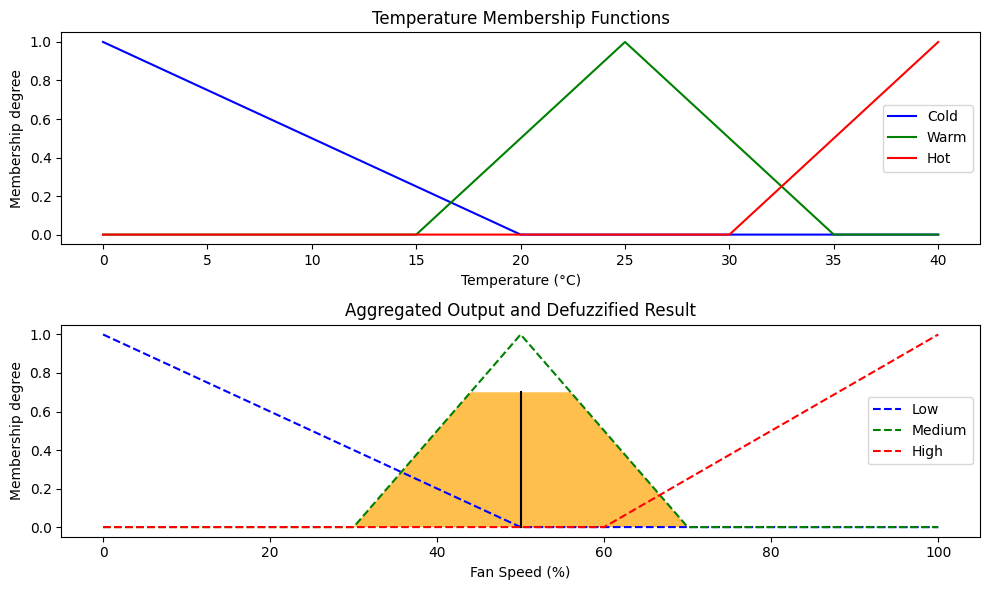

In [84]:
#Aditya Anand 23SCSE1010560
#Practical 10: Fuzzy Logic Example – Air Conditioner Control System
# Install scikit-fuzzy if not already installed
!pip install scikit-fuzzy

# Import necessary libraries
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Define universe of discourse (input and output ranges)
temperature = np.arange(0, 41, 1)
fan_speed = np.arange(0, 101, 1)

# 2. Define fuzzy membership functions

# Temperature membership functions (using triangular membership function: trimf)
temp_cold = fuzz.trimf(temperature, [0, 0, 20])
temp_warm = fuzz.trimf(temperature, [15, 25, 35])
temp_hot = fuzz.trimf(temperature, [30, 40, 40])

# Fan Speed membership functions
speed_low = fuzz.trimf(fan_speed, [0, 0, 50])
speed_medium = fuzz.trimf(fan_speed, [30, 50, 70])
speed_high = fuzz.trimf(fan_speed, [60, 100, 100])

# 3. Input temperature
temp_input = 28
print(f"Input Temperature: {temp_input}°C")

# 4. Fuzzify Input
cold_level = fuzz.interp_membership(temperature, temp_cold, temp_input)
warm_level = fuzz.interp_membership(temperature, temp_warm, temp_input)
hot_level = fuzz.interp_membership(temperature, temp_hot, temp_input)

print(f"Cold: {cold_level:.2f}, Warm: {warm_level:.2f}, Hot: {hot_level:.2f}")

# 5. Fuzzy Rules (Inference Engine)
activate_low = np.fmin(cold_level, speed_low)
activate_med = np.fmin(warm_level, speed_medium)
activate_high = np.fmin(hot_level, speed_high)

aggregated = np.fmax(activate_low, np.fmax(activate_med, activate_high))

# 6. Defuzzify (Centroid method)
fan_result = fuzz.defuzz(fan_speed, aggregated, 'centroid')

print(f"Defuzzified Fan Speed Output: {fan_result:.2f}%")

# 7. Plot membership functions (Temperature and Fan Speed)
plt.figure(figsize=(10,6))

plt.subplot(2, 1, 1)
plt.plot(temperature, temp_cold, 'b', label='Cold')
plt.plot(temperature, temp_warm, 'g', label='Warm')
plt.plot(temperature, temp_hot, 'r', label='Hot')
plt.title('Temperature Membership Functions')
plt.ylabel('Membership degree')
plt.xlabel('Temperature (°C)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fan_speed, speed_low, 'b', label='Low', linestyle='--')
plt.plot(fan_speed, speed_medium, 'g', label='Medium', linestyle='--')
plt.plot(fan_speed, speed_high, 'r', label='High', linestyle='--')
plt.fill_between(fan_speed, 0, aggregated, facecolor='Orange', alpha=0.7)
plt.plot([fan_result, fan_result], [0, np.max(aggregated)], 'k', linestyle='-')
plt.title('Aggregated Output and Defuzzified Result')
plt.xlabel('Fan Speed (%)')
plt.ylabel('Membership degree')
plt.legend()

plt.tight_layout()
plt.show()

In [85]:
#Aditya Anand 23SCSE1010560
#Practical 11: Minimal Fuzzy Operations (Union, Intersection, Complement)
#Initial Fuzzy Operations (Union,Intersectionn, Complement)
import numpy as np

A=np.array([0.2, 0.5, 0.7, 1.0])
B=np.array([0.4, 0.3, 0.8, 0.6])

union=np.fmax(A,B)
intersection=np.fmin(A,B)
complement_A=1-A
complement_B=1-B

print("Fuzzy Set A:", A)
print("Fuzzy Set B:", B)
print("\nUnion (A U B):", union)
print("Intersection (A n B):", intersection)
print("Complement of A:", complement_A)
print("Complement of B:", complement_B)

Fuzzy Set A: [0.2 0.5 0.7 1. ]
Fuzzy Set B: [0.4 0.3 0.8 0.6]

Union (A U B): [0.4 0.5 0.8 1. ]
Intersection (A n B): [0.2 0.3 0.7 0.6]
Complement of A: [0.8 0.5 0.3 0. ]
Complement of B: [0.6 0.7 0.2 0.4]


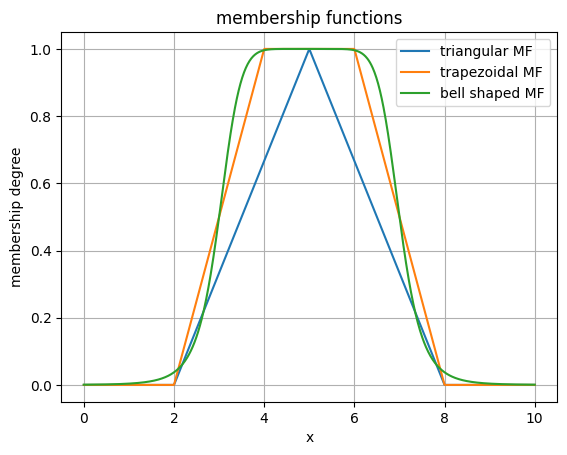

In [86]:
#Aditya Anand 23SCSE1010560
#Practical 12: Write a program to plot various membership functions. (i) Triangular membership function (ii) Trapezoidal membership function (iii) Bell-shaped membership functionAssignment

import numpy as np
import matplotlib.pyplot as plt

def triangular_mf(x, a, b, c):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def trapezoidal_mf(x, a, b, c, d):
    return np.maximum(0, np.minimum(np.minimum((x - a) / (b - a), 1), (d - x) / (d - c)))

def bell_shaped_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

x = np.linspace(0, 10, 1000)

tri_mf = triangular_mf(x, 2, 5, 8)
plt.plot(x, tri_mf, label='triangular MF')

trap_mf = trapezoidal_mf(x, 2, 4, 6, 8)
plt.plot(x, trap_mf, label='trapezoidal MF')

bell_mf = bell_shaped_mf(x, 2, 4, 5)
plt.plot(x, bell_mf, label='bell shaped MF')

plt.title('membership functions')
plt.xlabel('x')
plt.ylabel('membership degree')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
#Aditya Anand 23SCSE1010560
#Practical 13: Max-Min and Max-Product Composition of Fuzzy Relations To compute and compare the Max-Min and Max-Product compositions of two given fuzzy relations, demonstrating different methodsAssignment

import numpy as np

R = np.array([[0.6, 0.3],
              [0.2, 0.9]])

S = np.array([[1.0, 0.5, 0.3],
              [0.8, 0.4, 0.7]])

T_max_min = np.zeros((R.shape[0], S.shape[1]))
T_max_product = np.zeros((R.shape[0], S.shape[1]))

for i in range(R.shape[0]):
    for j in range(S.shape[1]):
        min_values = []
        product_values = []


        for k in range(R.shape[1]):
            min_values.append(min(R[i, k], S[k, j]))

            product_values.append(R[i, k] * S[k, j])

        T_max_min[i, j] = max(min_values)

        T_max_product[i, j] = max(product_values)

print("Max-Min Composition:")
print(T_max_min)
print("\nMax-Product Composition:")
print(T_max_product)

Max-Min Composition:
[[0.6 0.5 0.3]
 [0.8 0.4 0.7]]

Max-Product Composition:
[[0.6  0.3  0.21]
 [0.72 0.36 0.63]]


In [88]:
#Aditya Anand 23SCSE1010560
#Practical 14: Lambda-Cuts and Operations on Fuzzy Sets: Union, Intersection, and Complement
import numpy as np
A = np. array([0.2, 0.3, 0.4, 0.7, 0.11])
B = np. array ([0.4, 0.5, 0.6, 0.8, 0.9])
lambdas = [0.7, 0.2, 0.6, 0.5, 0.7, 0.3, 0.6, 0.8]

A_union_B = np. maximum(A, B)

A_intersect_B = np.minimum(A, B)

def lambda_cut (fuzzy_set, lambda_value):
 return [xi if mu >= lambda_value else 0 for xi, mu in enumerate(fuzzy_set, 1)]

print("Lambda cuts and operation:")
for lam in lambdas:
 A_cut = lambda_cut(A, lam)
 B_cut = lambda_cut(B, lam)
 print (f"\nλ-cut for λ = {lam}:")
 print(f"A: {A_cut}")
 print(f"B: {B_cut}")

 A_union_B_cut = lambda_cut(A_union_B,lam)
 A_intersect_B_cut = lambda_cut(A_intersect_B,lam)
 print(f"A U B: {A_union_B_cut}")
 print(f"A n B: {A_intersect_B_cut}")

Lambda cuts and operation:

λ-cut for λ = 0.7:
A: [0, 0, 0, 4, 0]
B: [0, 0, 0, 4, 5]
A U B: [0, 0, 0, 4, 5]
A n B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.2:
A: [1, 2, 3, 4, 0]
B: [1, 2, 3, 4, 5]
A U B: [1, 2, 3, 4, 5]
A n B: [1, 2, 3, 4, 0]

λ-cut for λ = 0.6:
A: [0, 0, 0, 4, 0]
B: [0, 0, 3, 4, 5]
A U B: [0, 0, 3, 4, 5]
A n B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.5:
A: [0, 0, 0, 4, 0]
B: [0, 2, 3, 4, 5]
A U B: [0, 2, 3, 4, 5]
A n B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.7:
A: [0, 0, 0, 4, 0]
B: [0, 0, 0, 4, 5]
A U B: [0, 0, 0, 4, 5]
A n B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.3:
A: [0, 2, 3, 4, 0]
B: [1, 2, 3, 4, 5]
A U B: [1, 2, 3, 4, 5]
A n B: [0, 2, 3, 4, 0]

λ-cut for λ = 0.6:
A: [0, 0, 0, 4, 0]
B: [0, 0, 3, 4, 5]
A U B: [0, 0, 3, 4, 5]
A n B: [0, 0, 0, 4, 0]

λ-cut for λ = 0.8:
A: [0, 0, 0, 0, 0]
B: [0, 0, 0, 4, 5]
A U B: [0, 0, 0, 4, 5]
A n B: [0, 0, 0, 0, 0]


Predicted Fan Speed (Mamdani FIS): 80.55555555555556


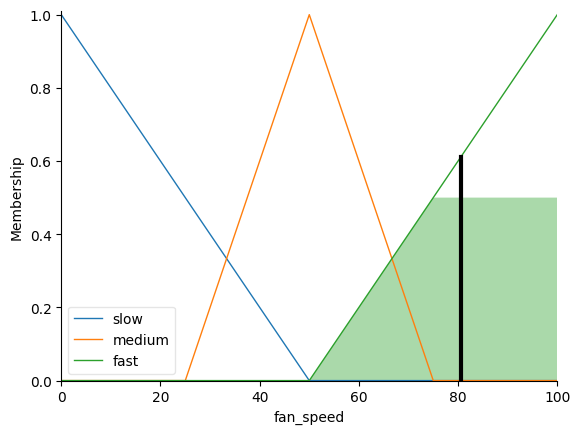

In [89]:
#Aditya Anand 23SCSE1010560
#Practical 15: Mamdani Fuzzy Inference System Example (Fan Speed Control)

# Mandani FIS Example using scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define input and output variables
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Define fuzzy membership functions
temperature['low'] = fuzz.trimf (temperature.universe, [0, 0, 20])
temperature[ 'medium'] = fuzz.trimf (temperature.universe, [10, 20, 30])
temperature[ 'high'] = fuzz.trimf (temperature.universe, [20, 40, 40])

humidity['low'] = fuzz.trimf (humidity.universe, [0, 0, 50])
humidity[ 'high'] = fuzz.trimf (humidity.universe, [30, 100, 100])


fan_speed['slow'] = fuzz.trimf (fan_speed.universe, [0, 0, 50])
fan_speed[ 'medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed[ 'fast'] = fuzz.trimf (fan_speed.universe, [50, 100, 100])


# Define fuzzy rules
rule1 = ctrl.Rule(temperature[ 'high'] | humidity ['high'], fan_speed[ 'fast' ])
rule2 = ctrl.Rule(temperature['medium'] & humidity['low'], fan_speed['medium' ])
rules3 = ctrl.Rule(temperature['low'] & humidity ['low'], fan_speed ['slow'])

# Build the control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rules3])
fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)

# Input values
fan_sim.input['temperature'] = 30
fan_sim.input ['humidity'] = 40
# Compute
fan_sim.compute()
print ("Predicted Fan Speed (Mamdani FIS):", fan_sim.output ['fan_speed'])
fan_speed.view(sim=fan_sim)

Output z: 19.12592592592593


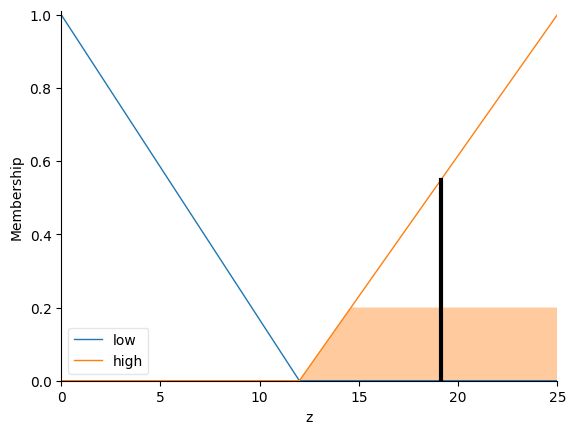

In [90]:
#Aditya Anand 23SCSE1010560
#Practical 16: Sugeno Fuzzy Inference System Example (Speed Control)Assignment

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

x = ctrl.Antecedent(np.arange(0, 11, 1), 'x')
y = ctrl.Antecedent(np.arange(0, 11, 1),'y')
z = ctrl.Consequent(np.arange(0, 26, 1),'z')

x['low'] = fuzz. trimf(x.universe, [0, 0, 5])
x['high'] = fuzz. trimf(x.universe, [5, 10, 10])

y[ 'low'] = fuzz.trimf(y.universe, [0, 0, 5])
y['high'] = fuzz. trimf (y.universe, [5, 10, 10])

z['low'] = fuzz.trimf (z.universe, [0, 0, 12])
z['high'] = fuzz.trimf(z.universe, [12, 25, 25])

rule1 = ctrl.Rule(x['low'] & y['low'],z['low'])
rule2 = ctrl.Rule(x['high'] | y['high'],z['high'])

z_ctrl = ctrl.ControlSystem([rule1, rule2])
z_sim = ctrl.ControlSystemSimulation(z_ctrl)

z_sim.input['x'] = 6
z_sim.input['y'] = 4
z_sim.compute()

print ("Output z:", z_sim.output ['z'])
z.view(sim=z_sim)

In [91]:
#Aditya Anand 23SCSE1010560
#Practical 17: λ-cut example(both)Assignment

# λ-cut example
fuzzy_set = {
20: 0.2,
25: 0.5,
30: 0.8,
35: 1.0,
40: 0.6
    }

# choose lambda (a)
lambda_cut = 0.6

# find crisp subset
crisp_subset = [x for x, mu in fuzzy_set.items ()if mu >= lambda_cut]

print (f"Fuzzy Set: {fuzzy_set}")
print(f"λ (lambda) = {lambda_cut}")
print(f"Crisp subset {lambda_cut}-cut: {crisp_subset}") # Corrected: Treated 'lambda_cut' as part of the string or accessed the variable directly

Fuzzy Set: {20: 0.2, 25: 0.5, 30: 0.8, 35: 1.0, 40: 0.6}
λ (lambda) = 0.6
Crisp subset 0.6-cut: [30, 35, 40]


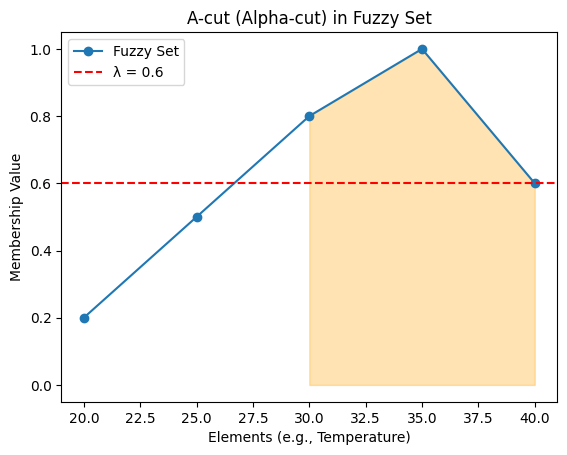

In [92]:
#Aditya Anand 23SCSE1010560
#Practical 17: λ-cut example(both)Assignment

import matplotlib.pyplot as plt
x = list (fuzzy_set. keys ())
y = list(fuzzy_set. values())
plt.plot(x, y, marker='o', label='Fuzzy Set')
plt.axhline(y=lambda_cut, color='r', linestyle='--', label=f"λ = {lambda_cut}")
plt.fill_between(x, y, where=[mu >= lambda_cut for mu in y], color='orange', alpha=0.3)
plt.xlabel('Elements (e.g., Temperature)')
plt.ylabel('Membership Value')
plt. title('A-cut (Alpha-cut) in Fuzzy Set')
plt. legend()
plt. show()

In [93]:
#Aditya Anand 23SCSE1010560
#Practical 18: Basic Genetic Algorithm in Python (simple binary GA)

#----------------------------
# FITNESS FUNCTION
# Maximize number of 1s
#-----------------------
def fitness(individual):
    return sum(individual)

#--------------------
# CREATE INITIAL POPULATION
#------------------------
import random
def create_individual(length=6):
    return [random.randint(0, 1) for _ in range(length)]

def create_population(size=6, length=6):
    return [create_individual(length) for _ in range(size)]

#-----------------------------------
# SELECTION: Tournament
#-----------------------------------
def select(population):
    a = random.choice(population)
    b = random.choice(population)
    return a if fitness(a) > fitness(b) else b
#----------------------------------
# CROSSOVER: Single Point
#----------------------------------
def crossover(p1, p2):
    point = random.randint(1, len(p1) - 1)
    return p1[:point] + p2[point:], p2[:point] + p1[point:]
#---------------------------------
# MUTATION: Bit Flip
#---------------------------------
def mutate(individual, mutation_rate=0.1):
    return [1-g if random.random() < mutation_rate else g for g in individual]
#------------------------------------
# GA MAIN LOOP
#------------------------------------
def genetic_algorithm(generations=10):
    population = create_population()
    print("Initial Population:", population)

    for gen in range(generations):
        new_pop = []
        for _ in range(len(population) // 2):
            parent1 = select(population)
            parent2 = select(population)

            child1, child2 = crossover(parent1, parent2)

            child1 = mutate(child1)
            child2 = mutate(child2)

            new_pop.extend([child1, child2])

        population = new_pop
        print(f"Gen {gen+1} Best:", max(population, key=fitness))

    return max(population, key=fitness)

best = genetic_algorithm()
print ("Best Final Solution:", best, "Fitness:" , fitness(best))

Initial Population: [[0, 1, 1, 0, 0, 0], [1, 0, 1, 1, 0, 1], [1, 1, 1, 1, 0, 1], [0, 1, 1, 1, 1, 0], [1, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0]]
Gen 1 Best: [1, 0, 1, 1, 1, 0]
Gen 2 Best: [1, 0, 1, 1, 1, 1]
Gen 3 Best: [1, 0, 1, 1, 1, 1]
Gen 4 Best: [1, 0, 1, 1, 1, 1]
Gen 5 Best: [1, 1, 1, 1, 1, 1]
Gen 6 Best: [1, 1, 1, 1, 1, 1]
Gen 7 Best: [1, 1, 1, 1, 1, 1]
Gen 8 Best: [1, 1, 1, 1, 1, 1]
Gen 9 Best: [1, 1, 1, 1, 1, 1]
Gen 10 Best: [1, 1, 1, 1, 1, 1]
Best Final Solution: [1, 1, 1, 1, 1, 1] Fitness: 6


In [94]:
#Aditya Anand 23SCSE1010560
#Practical 19: Implementation of Genetic Algorithm to Minimize and Maximize a Mathematical Function (f(x) = x²) using Selection, Crossover, and Mutation Operators.

import random
# FUNCTION: f(x) = x^2
def f(x):
    return x*x
# GA PARAMETERS
POP_SIZE = 6
GENERATIONS = 20
LOW, HIGH = -10, 10
MUT_RATE = 0.2

def random_individual():
    """Generates a random individual (a value for x) within the defined range."""
    return random.uniform(LOW, HIGH)

def selection(pop):
    """
    Selects the best two individuals from the current population for minimization.
    The 'best' means the ones with the lowest f(x) value.
    """
    # Sort the population based on the function value f(x)
    pop_sorted = sorted(pop, key=lambda x: f(x))
    # Return the two best (smallest f(x)) individuals
    return pop_sorted[0], pop_sorted[1]

def crossover(p1, p2):
    """
    Performs a linear crossover between two parents.
    A random weight (alpha) is used to combine the parents.
    """
    # Get a random weight between 0 and 1
    alpha = random.random()
    # Create a child by blending p1 and p2
    return alpha*p1 + (1-alpha)*p2

def mutation(x):
    """
    Randomly mutates the individual (x) with a probability of MUT_RATE.
    The mutation adds a small random value and clamps the result to the [LOW, HIGH] range.
    """
    if random.random() < MUT_RATE:
        # Add a small random value (between -1 and 1)
        x += random.uniform(-1, 1)
        # Clamp the value back within the LOW and HIGH bounds
        x = max(LOW, min(HIGH, x))
    return x

# --- MAIN EXECUTION ---

# INITIAL POPULATION
population = [random_individual() for _ in range(POP_SIZE)]

# Evolve the population over the generations
for gen in range(GENERATIONS):
    # 1. Selection: Choose parents
    p1, p2 = selection(population)

    # 2. Crossover: Create a child
    child = crossover(p1, p2)

    # 3. Mutation: Mutate the child
    child = mutation(child)

    # Add the new child to the population
    population.append(child)

    # Keep population trimmed by sorting and taking the best POP_SIZE individuals
    # This promotes finding the minimum by discarding the worst performers.
    population = sorted(population, key=lambda x: f(x))[:POP_SIZE]

    # Print best result for the current generation (for demonstration)
    print(f"Gen {gen: <2} \u2192 best x = {population[0]:.4f}, f(x) = {f(population[0]):.4f}")

# Final Results
print("\nFinal Minimized Value:")
print(f"x = {population[0]}, f(x) = {f(population[0])}")

Gen 0  → best x = -0.0720, f(x) = 0.0052
Gen 1  → best x = -0.0199, f(x) = 0.0004
Gen 2  → best x = -0.0199, f(x) = 0.0004
Gen 3  → best x = -0.0199, f(x) = 0.0004
Gen 4  → best x = -0.0199, f(x) = 0.0004
Gen 5  → best x = -0.0199, f(x) = 0.0004
Gen 6  → best x = -0.0199, f(x) = 0.0004
Gen 7  → best x = -0.0199, f(x) = 0.0004
Gen 8  → best x = -0.0199, f(x) = 0.0004
Gen 9  → best x = -0.0199, f(x) = 0.0004
Gen 10 → best x = -0.0199, f(x) = 0.0004
Gen 11 → best x = -0.0199, f(x) = 0.0004
Gen 12 → best x = -0.0199, f(x) = 0.0004
Gen 13 → best x = -0.0199, f(x) = 0.0004
Gen 14 → best x = -0.0199, f(x) = 0.0004
Gen 15 → best x = -0.0199, f(x) = 0.0004
Gen 16 → best x = -0.0199, f(x) = 0.0004
Gen 17 → best x = -0.0199, f(x) = 0.0004
Gen 18 → best x = -0.0199, f(x) = 0.0004
Gen 19 → best x = -0.0199, f(x) = 0.0004

Final Minimized Value:
x = -0.019921126937419195, f(x) = 0.00039685129845676867


In [95]:
#Aditya Anand 23SCSE1010560
#Practical 20: Implementation of Genetic Algorithm to Maximize the Function f(x) = x·sin(x) in the Range [0, 10] Using Selection, Crossover, and Mutation.Assignment

import random
import math

# --- GA Parameters ---
POP_SIZE = 6
GEN = 10
MUT_RATE = 0.1

# --- Fitness Function ---
def fitness(x):
    """
    The function to be maximized: f(x) = x * sin(x)
    """
    return x * math.sin(x)

# --- Generate Initial Population ---
def generate_population():
    """
    Generates a population of POP_SIZE random individuals in the range [0, 10).
    """
    return [random.uniform(0, 10) for _ in range(POP_SIZE)]

# --- Roulette Wheel Selection ---
def selection(pop):
    """
    Selects two parents using the Roulette Wheel method.
    Individuals with higher fitness (f(x)) have a greater chance of being selected.
    """
    # 1. Calculate fitness values for the entire population
    fit_vals = [fitness(x) for x in pop]

    # 2. Normalize fitness values to get selection probabilities
    # Note: This assumes all fitness values are non-negative for standard RWS.
    total_fit = sum(fit_vals)
    probs = [f / total_fit for f in fit_vals]

    # 3. Select two individuals based on the calculated probabilities
    # k=2 means selecting two individuals (parents)
    return random.choices(pop, weights=probs, k=2)

# --- Crossover ---
def crossover(p1, p2):
    """
    Performs Single-Point Crossover (blending) between two parents (p1, p2).
    It generates two children (c1, c2).
    """
    # Get a random weight (alpha) for blending
    alpha = random.random()

    # Linear combination to create child 1
    c1 = alpha * p1 + (1 - alpha) * p2

    # Linear combination to create child 2 (swapped weights)
    c2 = alpha * p2 + (1 - alpha) * p1

    return c1, c2

# --- Mutation ---
def mutate(x):
    """
    Randomly mutates the individual (x) with a probability of MUT_RATE.
    It adds a small random offset and clamps the result to the range [0, 10].
    """
    if random.random() < MUT_RATE:
        # Add a random offset between -0.5 and 0.5
        x += random.uniform(-0.5, 0.5)
        # Keep the individual within the defined range [0, 10]
        # max(0, x) ensures >= 0, min(10, x) ensures <= 10
        x = max(0, min(10, x))
    return x

# --- Genetic Algorithm Main Loop ---
def genetic_algorithm():
    """
    The main execution loop for the Genetic Algorithm.
    """
    population = generate_population()

    for gen in range(GEN):
        new_pop = []
        # Loop POP_SIZE / 2 times to create a new generation of size POP_SIZE
        for _ in range(POP_SIZE // 2):
            # 1. Selection
            p1, p2 = selection(population)

            # 2. Crossover
            c1, c2 = crossover(p1, p2)

            # 3. Mutation and add to the new generation
            new_pop.append(mutate(c1))
            new_pop.append(mutate(c2))

        # Replace the old population with the new generation
        population = new_pop

    # Return the best solution from the final population
    # max() with key=fitness finds the individual with the highest f(x)
    best_x = max(population, key=fitness)
    return best_x, fitness(best_x)

# --- Execution ---
best_x, best_fx = genetic_algorithm()

print(f"Best x: {best_x}")
print(f"Max f(x): {best_fx}")

Best x: 9.938228705744095
Max f(x): -4.881518339088016


In [96]:
#Aditya Anand 23SCSE1010560
#Practical 21: AI Search Algorithms: Graph Search

from collections import deque

def bfs_graph_search(graph, start, goal):
    queue = deque([start])
    visited = set()

    while queue:
        node = queue.popleft()
        print("Visiting:", node)   # DEBUG LINE

        if node == goal:
            return f"Goal found: {node}"

        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)

    return "Goal not found"

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['F'],
    'E': ['F'],
    'F': []
}

result = bfs_graph_search(graph, 'A', 'F')
print("Result:", result)


Visiting: A
Visiting: B
Visiting: C
Visiting: D
Visiting: E
Visiting: F
Result: Goal found: F


In [97]:
#Aditya Anand 23SCSE1010560
#Practical 21: AI Search Algorithms:Uniform Cost Search

import heapq

def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start, [start])]
    visited = set()

    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)

        if node == goal:
            return path, cost

        if node not in visited:
            visited.add(node)
            for neighbor, weight in graph.get(node, []):
                heapq.heappush(priority_queue,
                               (cost + weight, neighbor, path + [neighbor]))

    return None


graph_weighted = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 2), ('E', 5)],
    'C': [('F', 1)],
    'D': [],
    'E': [('F', 1)],
    'F': []
}

path, cost = uniform_cost_search(graph_weighted, 'A', 'F')
print("UCS Path:", path)
print("UCS Cost:", cost)



UCS Path: ['A', 'C', 'F']
UCS Cost: 5


In [98]:
#Aditya Anand 23SCSE1010560
#Practical 21: AI Search Algorithms:Greedy Best-First Search

def greedy_best_first_search(graph, heuristic, start, goal):
    priority_queue = [(heuristic[start], start, [start])]
    visited = set()

    while priority_queue:
        _, node, path = heapq.heappop(priority_queue)

        if node == goal:
            return path

        if node not in visited:
            visited.add(node)
            for neighbor in graph.get(node, []):
                heapq.heappush(priority_queue,
                               (heuristic[neighbor], neighbor, path + [neighbor]))

    return None


graph_simple = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

heuristic = {
    'A': 6,
    'B': 4,
    'C': 3,
    'D': 5,
    'E': 2,
    'F': 0
}

path = greedy_best_first_search(graph_simple, heuristic, 'A', 'F')
print("Greedy Best-First Path:", path)


Greedy Best-First Path: ['A', 'C', 'F']


In [99]:
#Aditya Anand 23SCSE1010560
#Practical 21: AI Search Algorithms: A Algorithm.Assignment

def a_star_search(graph, heuristic, start, goal):
    priority_queue = [(heuristic[start], 0, start, [start])]
    visited = set()

    while priority_queue:
        f_cost, g_cost, node, path = heapq.heappop(priority_queue)

        if node == goal:
            return path, g_cost

        if node not in visited:
            visited.add(node)
            for neighbor, cost in graph.get(node, []):
                new_g = g_cost + cost
                new_f = new_g + heuristic[neighbor]
                heapq.heappush(priority_queue,
                               (new_f, new_g, neighbor, path + [neighbor]))

    return None


path, cost = a_star_search(graph_weighted, heuristic, 'A', 'F')
print("A* Path:", path)
print("A* Cost:", cost)



A* Path: ['A', 'C', 'F']
A* Cost: 5
